In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

## 0. Install DarkHistory
(Sec environment variable `$DH_DIR` to directory containing `main.py`.)

In [2]:
import os, sys
sys.path.append(os.environ['DH_DIR'])

## 1. Define a Spectrum

In [3]:
from darkhistory.spec.spectrum import Spectrum

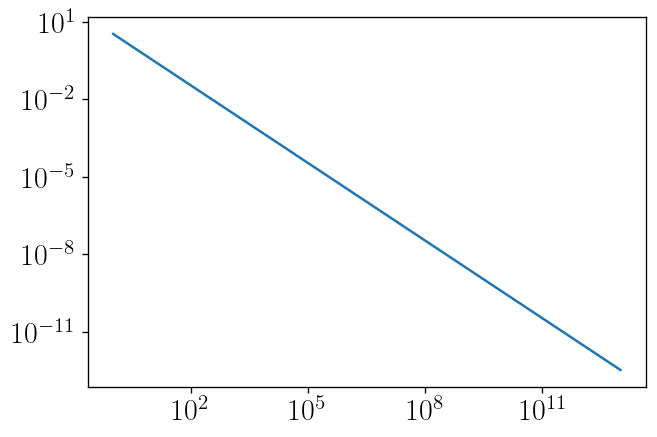

In [4]:
eng = np.logspace(0, 13, 100)
spec = Spectrum(eng, np.ones_like(eng), spec_type='N')
plt.plot(eng, spec.dNdE)
plt.loglog();

## 2. Define and applying a TransferFunction

In [5]:
from tfinterp import TransferFunction

In [6]:
# generate fake data
in_eng = np.logspace(0, 13, 100) # ingoing spectrum
eng = np.logspace(0, 13, 100) # outgoing spectrum

eng_in_ss, eng_out_ss = np.meshgrid(in_eng, eng)
data = np.sin(np.log(eng_in_ss)/2) * np.sin(np.log(eng_out_ss)/2)
for i, row in enumerate(data):
    row[i] = 1
    row[i+1:] *= 0

tf = TransferFunction(data, eng=eng, in_eng=in_eng, spec_type='N') # N -> N type transfer function

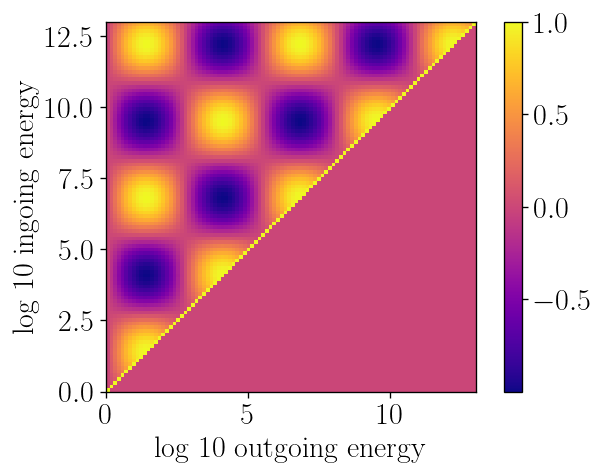

In [7]:
plt.imshow(np.flipud(tf.grid_vals), extent=np.log10((tf.in_eng[0], tf.in_eng[-1], tf.eng[0], tf.eng[-1])), cmap='plasma')
plt.xlabel('log 10 outgoing energy')
plt.ylabel('log 10 ingoing energy')
plt.colorbar();

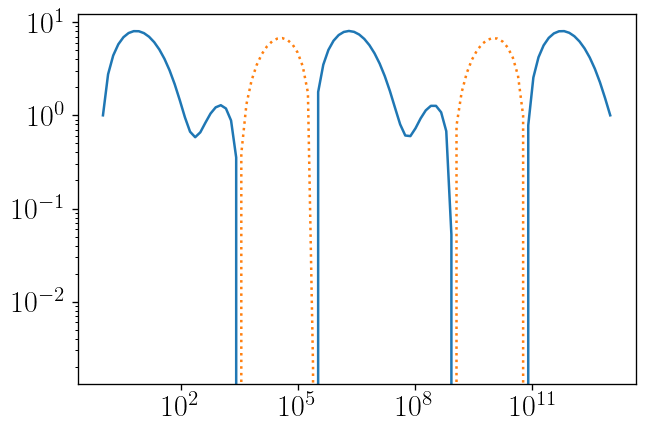

In [8]:
# applying transfer function to a spectrum
out_spec = tf(spec)

plt.plot(out_spec.eng, out_spec.N)
plt.plot(out_spec.eng, -out_spec.N, ':')
plt.loglog();

## 3. Get a TransferFunction from TransferFunctionInterp

In [9]:
from tfinterp import TransferFunctionInterp

In [10]:
# define abscissa
abscs = {
    'nBs' : np.logspace(np.log10(0.01), np.log10(1.7), 5),
    'x' : np.linspace(0, 1, 5),
    'rs' : np.logspace(np.log10(4), np.log10(40), 5),
    'in_eng' : np.logspace(0, 13, 100),
    'eng' : np.logspace(0, 13, 100)
}

In [11]:
# generate fake data
grid_vals = np.zeros((5, 5, 5, 100, 100))
for i0 in range(5):
    for i1 in range(5):
        for i2 in range(5):
            for i3 in range(100):
                for i4 in range(i3):
                    grid_vals[i0,i1,i2,i3,i4] = np.sin(i0+i1+i2+i3/10+i4/5)
grid_vals = np.array(grid_vals)

In [12]:
tfi = TransferFunctionInterp(grid_vals, abscs, ['nBs', 'x', 'rs'], spec_type='N', log_interp=False)

In [13]:
tf = tfi(nBs=1, x=0.5, rs=10)

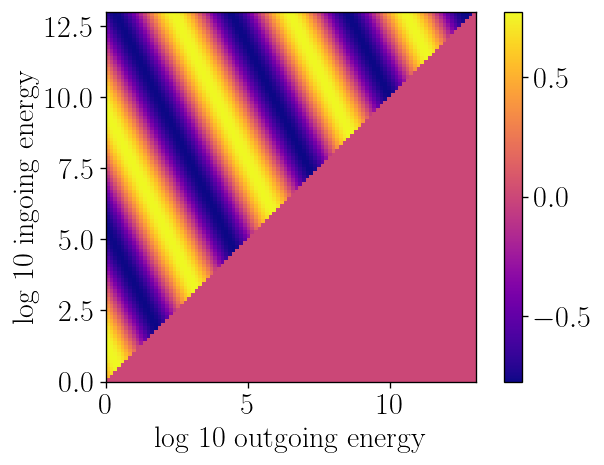

In [14]:
plt.imshow(np.flipud(tf.grid_vals), extent=np.log10((tf.in_eng[0], tf.in_eng[-1], tf.eng[0], tf.eng[-1])), cmap='plasma')
plt.xlabel('log 10 outgoing energy')
plt.ylabel('log 10 ingoing energy')
plt.colorbar();

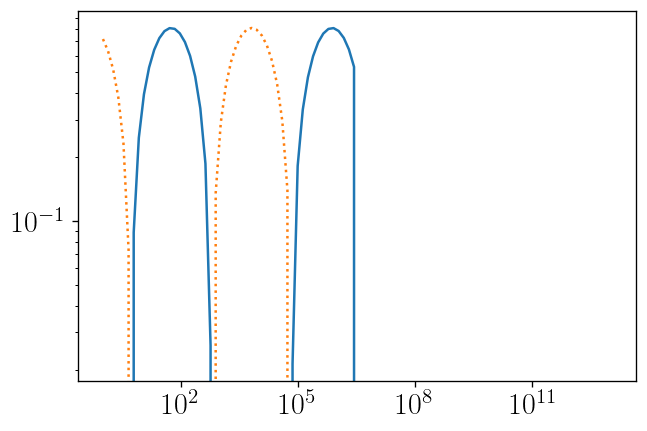

In [15]:
# applying transfer function to a spectrum
spec_data = np.zeros((100,))
spec_data[50] = 1
spec = Spectrum(abscs['eng'], spec_data, spec_type='N')
out_spec = tfi(nBs=0.7, x=0.3, rs=14)(spec)

plt.plot(out_spec.eng, out_spec.N)
plt.plot(out_spec.eng, -out_spec.N, ':')
plt.loglog();

## 4. Energy deposition $f$'s

In [16]:
# define abscissa
abscs_f = {
    'nBs' : np.logspace(np.log10(0.01), np.log10(1.7), 5),
    'x' : np.linspace(0, 1, 5),
    'rs' : np.logspace(np.log10(4), np.log10(40), 5),
    'in_eng' : np.logspace(0, 13, 100),
    'eng' : np.arange(3) # say, ion, exc, heat
}

In [17]:
# generate fake data
grid_vals_f = np.zeros((5, 5, 5, 100, 3))
for i0 in range(5):
    for i1 in range(5):
        for i2 in range(5):
            for i3 in range(100):
                for i4 in range(3):
                    grid_vals_f[i0,i1,i2,i3,i4] = np.abs(np.sin(i0+i1+i2+i3/10+i4/5))
grid_vals_f = np.array(grid_vals_f)

In [18]:
fi = TransferFunctionInterp(grid_vals_f, abscs_f, ['nBs', 'x', 'rs'], spec_type='N', log_interp=False)

In [19]:
print('ionization, excitation, heating', fi(nBs=1, x=0.5, rs=10)(spec).N)

ionization, excitation, heating [0.63672411 0.57994282 0.50004103]
